In [1]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import np_utils
from keras.layers import Add
from keras.layers import concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time



#  Camera model 

image_list = []

def my_load_Train_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Wavelet/outputDWTrain/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Wavelet/outputDWTest/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X1_train = my_load_Train_data_1()
X1_test = my_load_Test_data_1()
#print(len(X1_test))
y1_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Wavelet/y_labels.csv')
y1_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Wavelet/y_test_labels.csv')
y1_test.values.reshape(-1,1)

n_classes = 8
X1_train = np.array(X1_train)
Y1_train = np.array(y1_train)
X1_test = np.array(X1_test)
Y1_test = np.array(y1_test)

Y1_train = np_utils.to_categorical(Y1_train, n_classes)
Y1_test = np_utils.to_categorical(Y1_test, n_classes)
# len(X1_train)
# print(Y1_test)
X1_train.shape
Y1_train.shape


# Model 1(camera)

inp1 = Input(shape=(32, 32, 3))

# convolutional layer
conv1=Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp1)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=(Dense(25, activation='relu'))(flat1)
dense1=(Dense(10, activation='relu'))(hidd1)
#output1=Flatten()(dense1)

#output= (Dense(10, activation='relu'))(model_1)


# for camera model
dense_camera=Dense(8,activation='softmax')(dense1)
output_camera = dense_camera

# camera model

model_camera = Model(inputs= inp1, outputs = output_camera)
model_camera.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
history= model_camera.fit(X1_train,Y1_train, batch_size=128,epochs=15,validation_data=(X1_test,Y1_test))



Epoch 1/15
16/16 [==============================] - 25s 2s/step - loss: 2.0784 - accuracy: 0.1416 - val_loss: 2.0634 - val_accuracy: 0.1650
Epoch 2/15
16/16 [==============================] - 24s 2s/step - loss: 2.0498 - accuracy: 0.1614 - val_loss: 1.9967 - val_accuracy: 0.2200
Epoch 3/15
16/16 [==============================] - 24s 1s/step - loss: 1.9615 - accuracy: 0.1910 - val_loss: 1.9321 - val_accuracy: 0.2675
Epoch 4/15
16/16 [==============================] - 26s 2s/step - loss: 1.8079 - accuracy: 0.2871 - val_loss: 1.7255 - val_accuracy: 0.3425
Epoch 5/15
16/16 [==============================] - 25s 2s/step - loss: 1.6214 - accuracy: 0.3622 - val_loss: 1.7059 - val_accuracy: 0.3250
Epoch 6/15
16/16 [==============================] - 25s 2s/step - loss: 1.5020 - accuracy: 0.3877 - val_loss: 1.5069 - val_accuracy: 0.3600
Epoch 7/15
16/16 [==============================] - 24s 2s/step - loss: 1.4040 - accuracy: 0.4008 - val_loss: 1.5032 - val_accuracy: 0.3625
Epoch 8/15
16/16 [==

In [2]:

#model.save_weights(top_model_weights_path)
start = datetime.datetime.now()
(eval_loss, eval_accuracy) = model_camera.evaluate(X1_test,Y1_test, batch_size=128, verbose=1)
print('[INFO] Accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

4/4 [==============================] - 1s 301ms/step - loss: 1.3360 - accuracy: 0.4375
[INFO] Accuracy: 43.75%
[INFO] Loss: 1.3359988927841187
Time:  0:00:01.403401


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


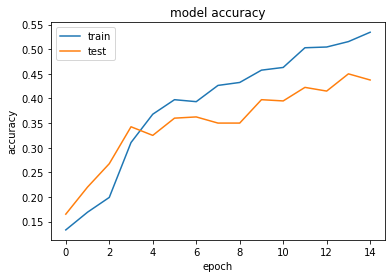

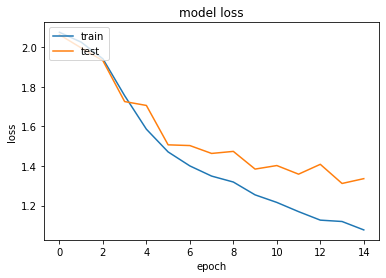

In [3]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Input image: plate_bottle1.jpg

probality of chair_bottle:  0.3159420331940055

probality of plate_bottle:  99.5840072631836

probality of spectacle_laptop:  0.07977214991115034

probality of table_bottle:  0.014977369573898613

probality of table_chair:  1.0328367494594204e-06

probality of table_laptop:  0.000403600643039681

probality of table_plate:  0.004895125312032178

probality of table_spectacle:  2.6524494600721482e-06


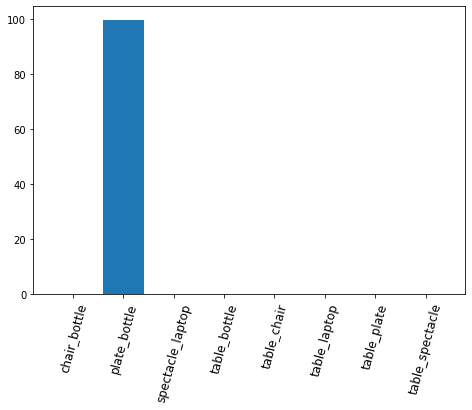

__________________________________________________________________
Input image: table_laptop25.jpg

probality of chair_bottle:  0.18192495917901397

probality of plate_bottle:  0.02939333498943597

probality of spectacle_laptop:  11.232134699821472

probality of table_bottle:  0.17471242463216186

probality of table_chair:  20.87782621383667

probality of table_laptop:  22.638186812400818

probality of table_plate:  16.26449078321457

probality of table_spectacle:  28.601333498954773


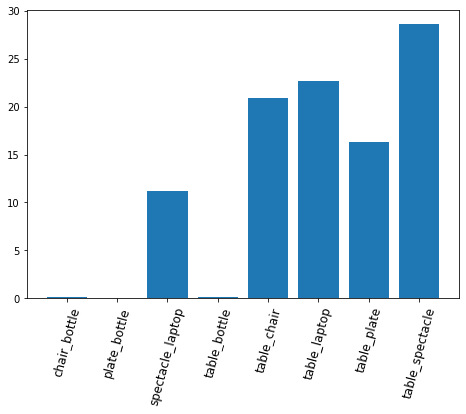

__________________________________________________________________
Input image: table_bottle8.jpg

probality of chair_bottle:  38.400277495384216

probality of plate_bottle:  0.4285125061869621

probality of spectacle_laptop:  1.1999151669442654

probality of table_bottle:  59.902870655059814

probality of table_chair:  0.030572450486943126

probality of table_laptop:  0.02984211896546185

probality of table_plate:  0.00793698345660232

probality of table_spectacle:  7.882881050136348e-05


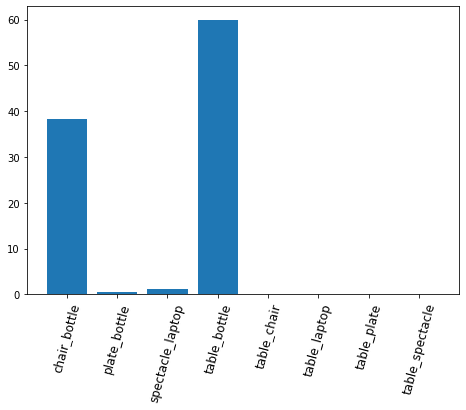

__________________________________________________________________
Input image: chair_bottle1.jpg

probality of chair_bottle:  48.94605576992035

probality of plate_bottle:  2.3116853088140488

probality of spectacle_laptop:  0.03571096749510616

probality of table_bottle:  48.70648384094238

probality of table_chair:  8.669888984513818e-06

probality of table_laptop:  4.7293460170294566e-05

probality of table_plate:  1.4143860482818127e-05

probality of table_spectacle:  2.3501303333950396e-09


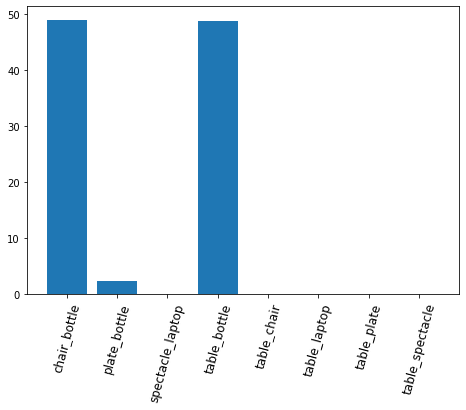

__________________________________________________________________
Input image: table_spectacle32.jpg

probality of chair_bottle:  0.02210451493738219

probality of plate_bottle:  0.0019508401237544604

probality of spectacle_laptop:  3.6166831851005554

probality of table_bottle:  0.01314234541496262

probality of table_chair:  32.38726854324341

probality of table_laptop:  13.861052691936493

probality of table_plate:  7.441495358943939

probality of table_spectacle:  42.656296491622925


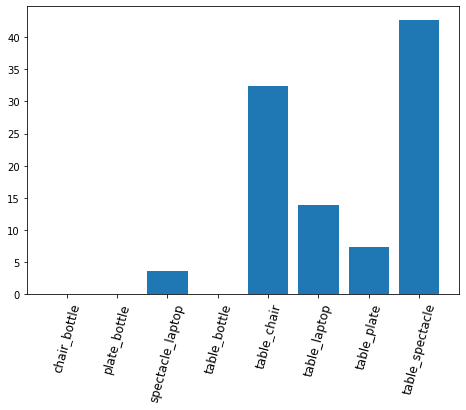

__________________________________________________________________
Input image: table_chair8.jpg

probality of chair_bottle:  5.454643070697784

probality of plate_bottle:  0.23713239934295416

probality of spectacle_laptop:  42.83344745635986

probality of table_bottle:  7.596218585968018

probality of table_chair:  20.872020721435547

probality of table_laptop:  13.67296576499939

probality of table_plate:  6.851670891046524

probality of table_spectacle:  2.481899783015251


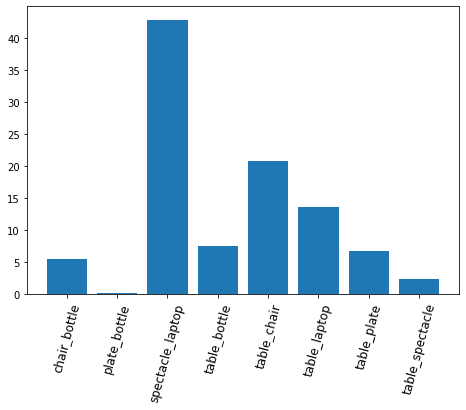

__________________________________________________________________
Input image: table_plate37.jpg

probality of chair_bottle:  0.3058896167203784

probality of plate_bottle:  0.04974796902388334

probality of spectacle_laptop:  23.929573595523834

probality of table_bottle:  0.4681419115513563

probality of table_chair:  5.960720777511597

probality of table_laptop:  31.703734397888184

probality of table_plate:  27.695631980895996

probality of table_spectacle:  9.886550903320312


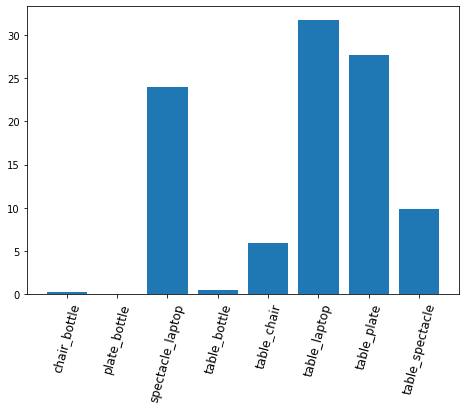

__________________________________________________________________
Input image: spectacle_laptop43.jpg

probality of chair_bottle:  2.463177964091301

probality of plate_bottle:  0.516303488984704

probality of spectacle_laptop:  40.26495814323425

probality of table_bottle:  5.645695701241493

probality of table_chair:  9.131570160388947

probality of table_laptop:  18.099652230739594

probality of table_plate:  17.595332860946655

probality of table_spectacle:  6.283304840326309


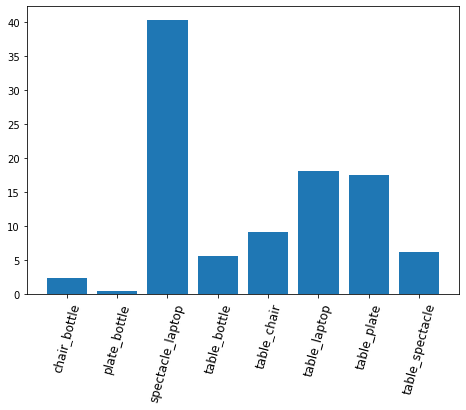

__________________________________________________________________


In [8]:
# make a prediction for a new thermal image.

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

ListPic = {'chair_bottle1.jpg','table_chair8.jpg','table_bottle8.jpg','table_plate37.jpg',
          'table_spectacle32.jpg','table_laptop25.jpg','spectacle_laptop43.jpg','plate_bottle1.jpg'}



for item in ListPic:
 # load the image thermal
 img1 = load_img(item, target_size=(32, 32))

 # convert to array
 img1 = img_to_array(img1)

 # reshape into a single sample with 3 channels
 img1 = img1.reshape(1,32, 32, 3)

 # prepare pixel data
 img1 = img1.astype('float32')
 img1 = img1 / 255.0

 # prediction od data
 result = model_camera.predict(img1)
 
 print('Input image:',item)
 #print(result)
 print('')
 Bed = result[0][0]*100
 print("probality of chair_bottle: ", Bed)
 print()
 Bottle = result[0][1]*100
 print("probality of plate_bottle: ", Bottle)
 print()
 Chair = result[0][2]*100
 print("probality of spectacle_laptop: ", result[0][2]*100)
 print()
 Laptop = result[0][3]*100
 print("probality of table_bottle: ", result[0][3]*100)
 print()
 Plate = result[0][4]*100
 print("probality of table_chair: ", result[0][4]*100)
 print()
 Sofa = result[0][5]*100   
 print("probality of table_laptop: ", result[0][5]*100)
 print()
 Spectacle = result[0][6]*100
 print("probality of table_plate: ", result[0][6]*100)
 print()
 Table = result[0][7]*100   
 print("probality of table_spectacle: ", result[0][7]*100)
    
 # importing the required module
 import matplotlib.pyplot as plt
  
 fig = plt.figure()
 plt.rcParams['xtick.labelsize'] = 'large' 
 ax = fig.add_axes([0,0,1,1])    

 # x axis values
 x = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
 # corresponding y axis values
 y = [Bed,Bottle,Chair,Laptop,Plate,Sofa,Spectacle,Table]

 ax.bar(x,y)
 plt.xticks(rotation=75)
 plt.show()   
    
 print("__________________________________________________________________")

 
    
 

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools  


preds = np.round(model_camera.predict([X1_test]),0)
#print('rounded test_labels', preds)


print('Classification Matrix')

fusion = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
classification_metrics = metrics.classification_report(Y1_test, preds,target_names = fusion)
print(classification_metrics)

print('Confusion Matrix')

sign=[0,1,2,3,4,5,6,7]
cf_matrix = confusion_matrix(Y1_test.argmax(axis=1), preds.argmax(axis=1),sign)
print(cf_matrix)

Classification Matrix
                  precision    recall  f1-score   support

    chair_bottle       0.81      0.52      0.63        50
    plate_bottle       0.79      0.92      0.85        50
spectacle_laptop       0.45      0.18      0.26        50
    table_bottle       0.71      0.44      0.54        50
     table_chair       0.38      0.06      0.10        50
    table_laptop       0.31      0.08      0.13        50
     table_plate       0.00      0.00      0.00        50
 table_spectacle       0.00      0.00      0.00        50

       micro avg       0.68      0.28      0.39       400
       macro avg       0.43      0.28      0.31       400
    weighted avg       0.43      0.28      0.31       400
     samples avg       0.28      0.28      0.28       400

Confusion Matrix
[[36  8  0  6  0  0  0  0]
 [ 3 46  0  1  0  0  0  0]
 [38  0  9  0  2  1  0  0]
 [21  3  4 22  0  0  0  0]
 [39  0  5  0  3  3  0  0]
 [43  0  1  1  1  4  0  0]
 [45  1  0  0  0  4  0  0]
 [45  0  1  1  

C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Normalized confusion matrix


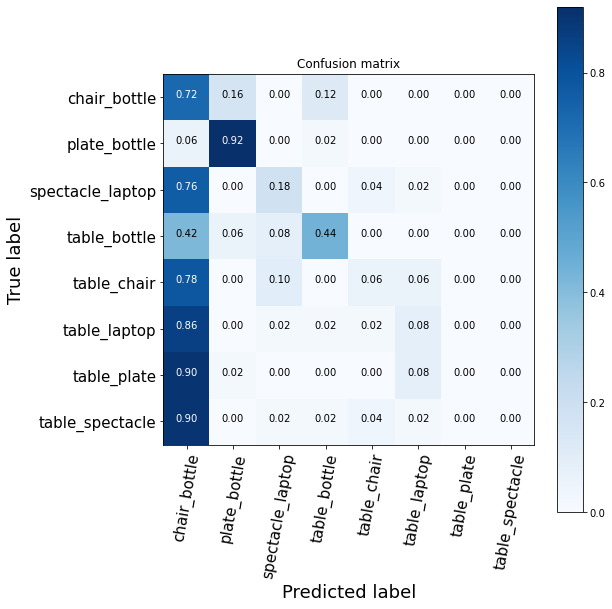

In [6]:
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns

categorical_test_labels = pd.DataFrame(Y1_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
 #‘’’prints pretty confusion metric with normalization option ‘’’
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
 
   plt.figure(figsize=(8, 8))
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
    
    # Labels, title and ticks
   label_font = {'size':'18'}  # Adjust to fit
   plt.xlabel('Predicted label', fontdict=label_font);
   plt.ylabel('True label', fontdict=label_font);
   plt.tick_params(labelsize = 15) 
   plt.xticks(rotation=80) 
    
    
plot_confusion_matrix(confusion_matrix, fusion , normalize= True) 